In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('customer.csv')
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

In [5]:
df['Sex']=df['Sex'].astype(object)

In [6]:
df.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [7]:
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [8]:
df.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [9]:
df.isnull().sum()

Cust_Number         0
Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

In [10]:
df.isna().sum()

Cust_Number         0
Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

In [11]:
df_num=df.select_dtypes(np.number)

In [12]:
df_num

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79
2,16000,23,8
3,16000,25,79
4,17000,32,41
...,...,...,...
195,120000,36,79
196,126000,46,32
197,126000,29,72
198,137000,32,22


Yearly_Income


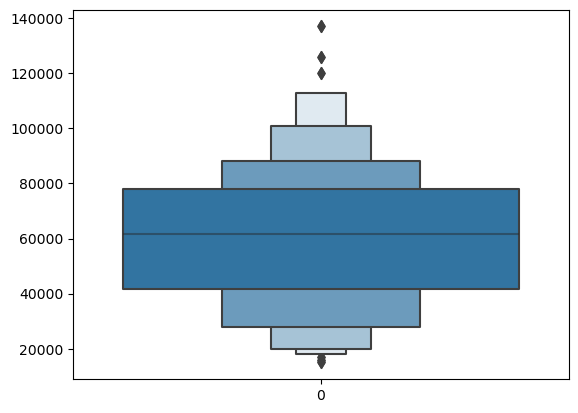

Age


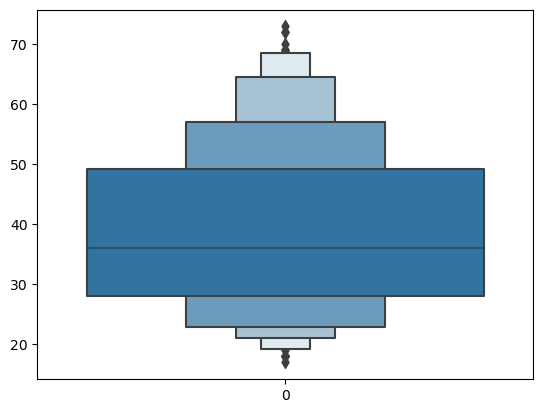

Cust_Spend_Score


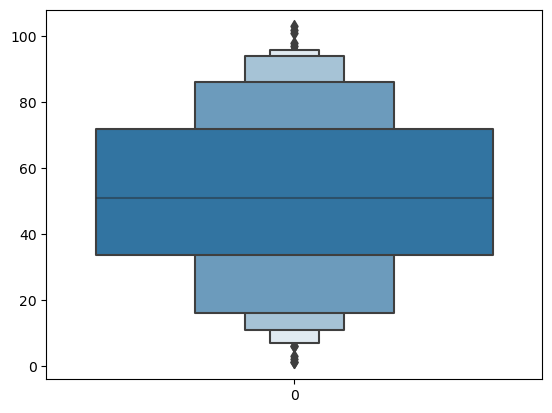

In [13]:
for i in df_num.columns:
    print(i)
    sns.boxenplot(df_num[i])
    plt.show()

In [14]:
df1=df_num[df_num['Yearly_Income']<130000]

<Axes: >

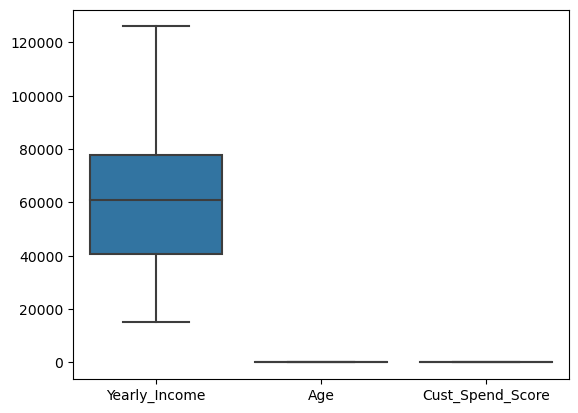

In [15]:
sns.boxplot(df1)

In [16]:
df1=df1[['Yearly_Income','Cust_Spend_Score']]
df1

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41
...,...,...
193,113000,94
194,120000,17
195,120000,79
196,126000,32


In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df1)
print(type(df_sc))
df_sc=pd.DataFrame(df_sc,columns=df1.columns)
df_sc.head()

<class 'numpy.ndarray'>


,Yearly_Income,Cust_Spend_Score
0,-1.779171,-0.283684
1,-1.779171,1.068399
2,-1.739447,-1.674398
3,-1.739447,1.068399
4,-1.699723,-0.399577


In [18]:
from sklearn.cluster import KMeans

In [19]:
err=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    err.append(km.inertia_)

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

In [20]:
err
#inersiaabs

[396.0,
 264.11904162019016,
 157.01117743011798,
 107.11793169599974,
 62.11726077456708,
 53.3012589085911,
 44.65325629532576,
 36.878530824221016,
 32.17058791584211,
 28.743943329604623,
 25.836672477019295,
 23.236220951591093,
 21.803214368716798,
 19.939780852647196,
 18.579170667469864,
 16.671687502358374,
 15.920047977132251,
 14.774998133630113,
 13.801193937700651]

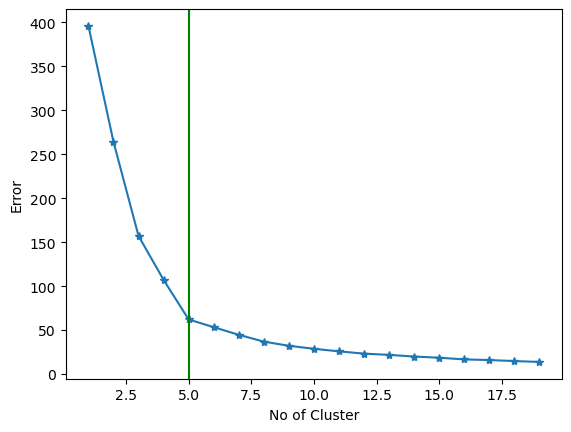

In [21]:
plt.plot(range(1,20),err,marker='*')
plt.xlabel('No of Cluster')
plt.ylabel('Error')
plt.axvline(5,c='g')
plt.show()

In [22]:
# gotk value 5



In [23]:
# RUNMODEL WITH K 

In [24]:
km=KMeans(n_clusters=5)
km.fit(df_sc)

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [25]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [26]:
extra=pd.DataFrame(km.labels_)

In [27]:
df_sc['cluster']=extra

In [28]:
df_sc

,Yearly_Income,Cust_Spend_Score,cluster
0,-1.779171,-0.283684,4
1,-1.779171,1.068399,3
2,-1.739447,-1.674398,4
3,-1.739447,1.068399,3
4,-1.699723,-0.399577,4
...,...,...,...
193,2.113819,1.647864,2
194,2.391890,-1.326719,1
195,2.391890,1.068399,2
196,2.630236,-0.747255,1


In [29]:
cent=km.cluster_centers_

In [30]:
cent

array([[-0.20260946, -0.005541  ],
       [ 1.0379503 , -1.25267674],
       [ 1.0098993 ,  1.23512235],
       [-1.37814418,  1.16957561],
       [-1.33011303, -1.12852583]])

In [31]:
sc.inverse_transform(cent)

array([[5.46875000e+04, 5.12000000e+01],
       [8.59166667e+04, 1.89166667e+01],
       [8.52105263e+04, 8.33157895e+01],
       [2.50952381e+04, 8.16190476e+01],
       [2.63043478e+04, 2.21304348e+01]])

In [32]:
cent

array([[-0.20260946, -0.005541  ],
       [ 1.0379503 , -1.25267674],
       [ 1.0098993 ,  1.23512235],
       [-1.37814418,  1.16957561],
       [-1.33011303, -1.12852583]])

In [33]:
df_sc.drop('cluster',axis=1,inplace=True)

In [34]:
cent1=pd.DataFrame(sc.inverse_transform(cent),columns=df_sc.columns,
                  index=['Group0','Group1','Group2','Group3','Group4'])

In [35]:
cent1

,Yearly_Income,Cust_Spend_Score
Group0,54687.500000,51.200000
Group1,85916.666667,18.916667
Group2,85210.526316,83.315789
Group3,25095.238095,81.619048
Group4,26304.347826,22.130435


In [36]:
a=np.array([[1,2,3,5,4,6],
   [9,8,7,5,4,5]
])
df2=pd.DataFrame(a,columns=['A','B','C','D','E','F'],index=['Group1','Group2'])

In [37]:
df2

,A,B,C,D,E,F
Group1,1,2,3,5,4,6
Group2,9,8,7,5,4,5


In [38]:
df1.head()

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41


In [39]:
df1['Label']=km.labels_
df1.head()

,Yearly_Income,Cust_Spend_Score,Label
0,15000,44,4
1,15000,79,3
2,16000,8,4
3,16000,79,3
4,17000,41,4


In [40]:
df1['Label'].value_counts()

Label
0    80
2    38
1    36
4    23
3    21
Name: count, dtype: int64

In [41]:
df1.columns

Index(['Yearly_Income', 'Cust_Spend_Score', 'Label'], dtype='object')

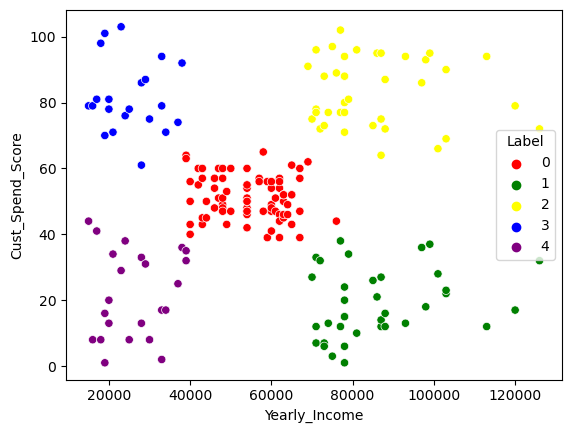

In [42]:
sns.scatterplot(x=df1['Yearly_Income'],y=df1['Cust_Spend_Score'],hue=df1['Label'],palette=['red','green','yellow','blue','purple'])
plt.show()

In [43]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


In [44]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer 

In [45]:
df_sc



,Yearly_Income,Cust_Spend_Score
0,-1.779171,-0.283684
1,-1.779171,1.068399
2,-1.739447,-1.674398
3,-1.739447,1.068399
4,-1.699723,-0.399577
...,...,...
193,2.113819,1.647864
194,2.391890,-1.326719
195,2.391890,1.068399
196,2.630236,-0.747255


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   2 cluster is 0.35693558260199687


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


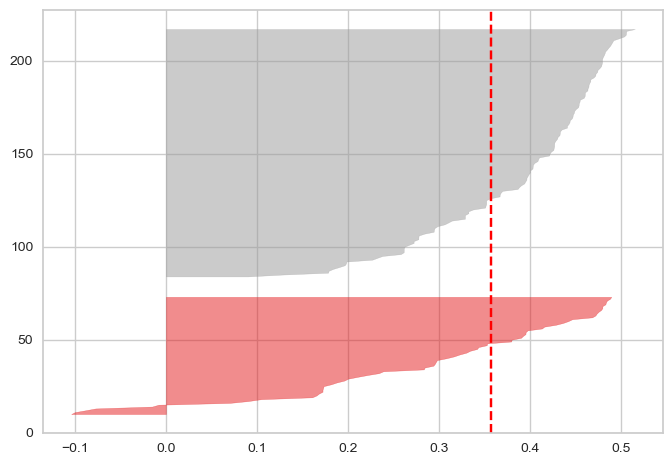

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   3 cluster is 0.464085451156394


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


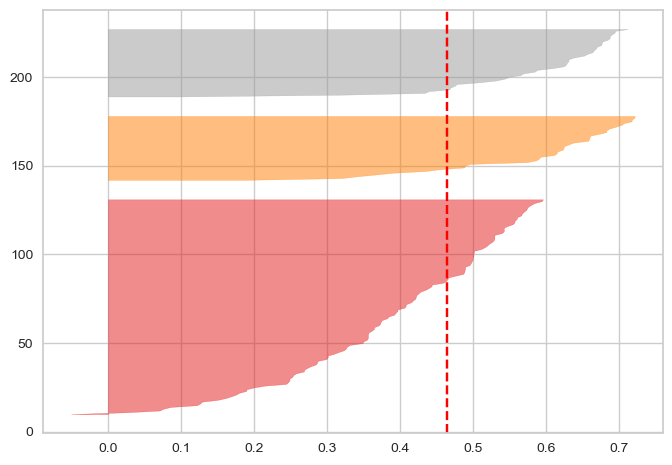

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   4 cluster is 0.4970326297186363


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


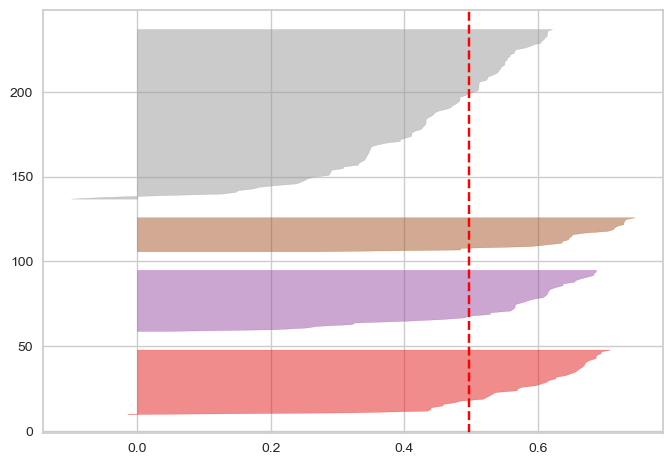

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   5 cluster is 0.5582289588979077


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


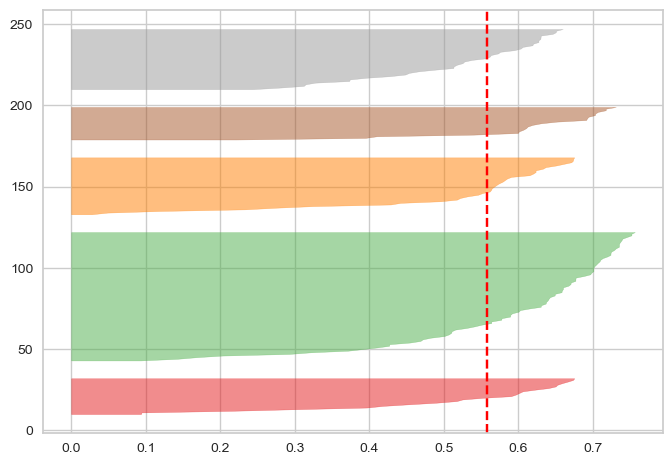

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   6 cluster is 0.5424905196078038


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


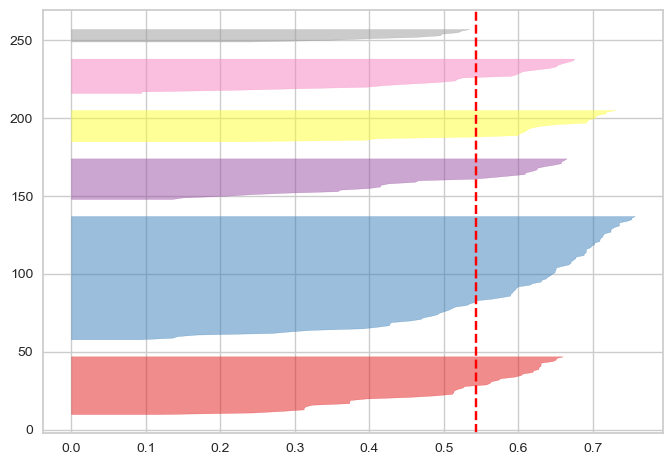

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   7 cluster is 0.4596998896881322


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


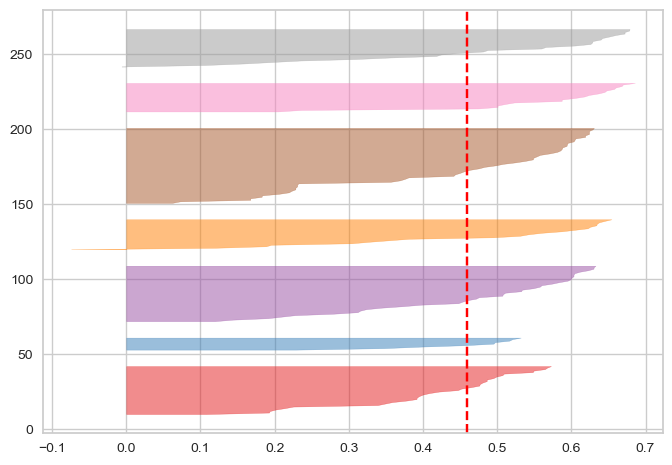

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   8 cluster is 0.45543289610526977


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


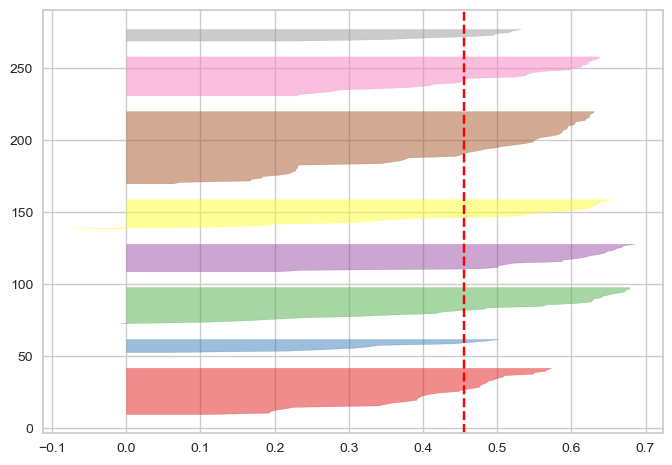

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   9 cluster is 0.45426623046487186


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


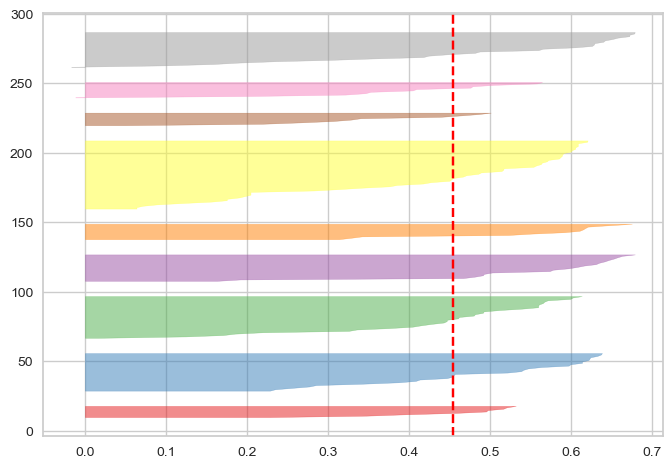

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   10 cluster is 0.44500952592478654


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


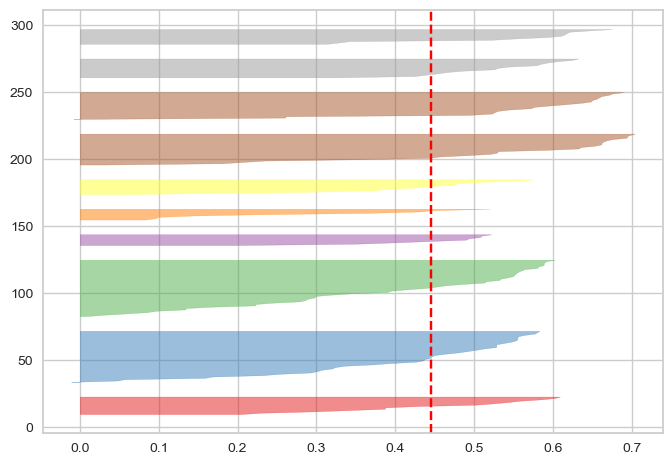

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   11 cluster is 0.43407034210723955


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


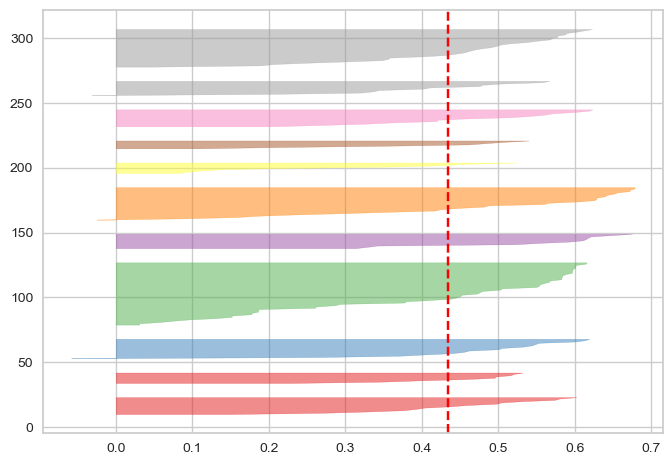

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   12 cluster is 0.43610556796115496


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


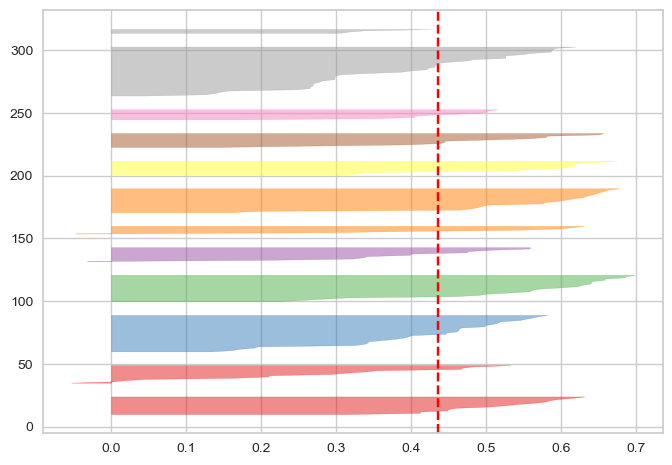

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   13 cluster is 0.4080696799665663


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


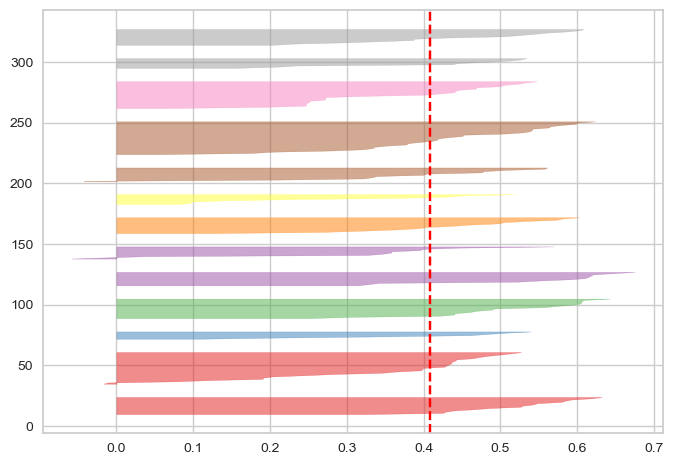

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   14 cluster is 0.4128521353723772


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


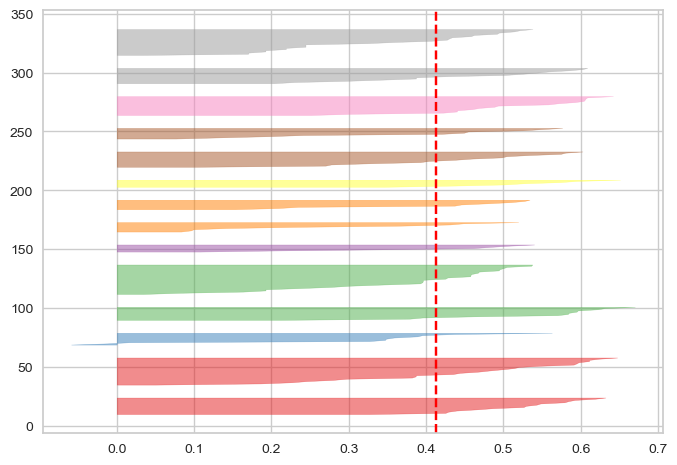

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   15 cluster is 0.3856514677987681


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


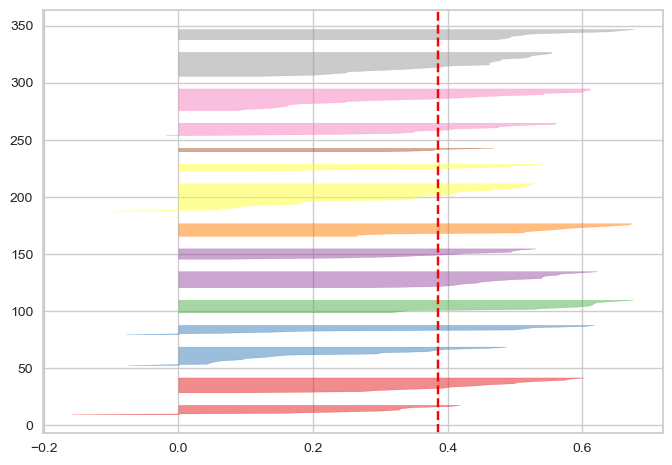

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   16 cluster is 0.41244666567609195


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


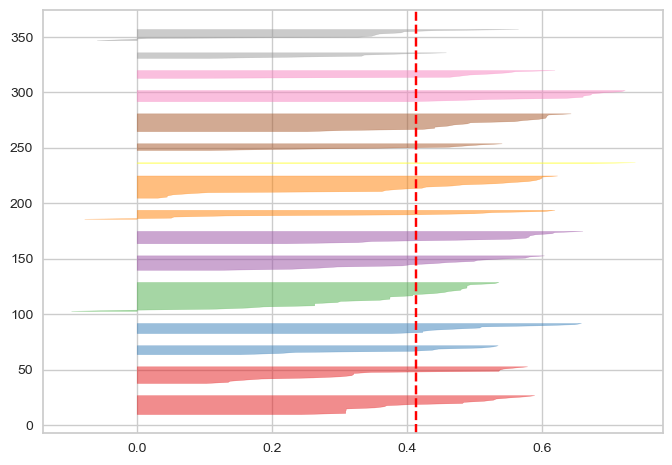

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   17 cluster is 0.4126967929921025


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


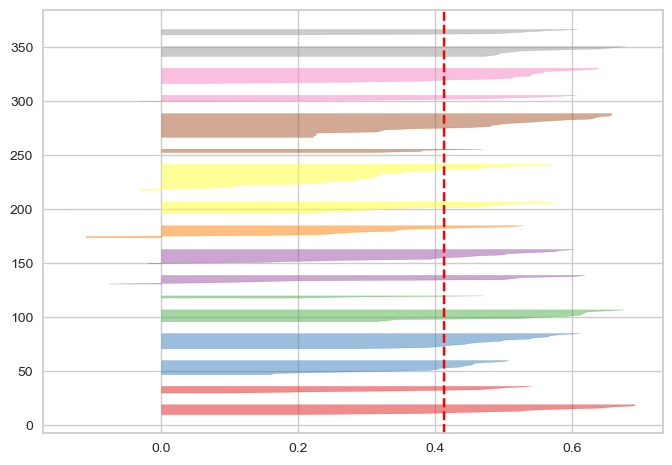

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   18 cluster is 0.4195009507693789


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


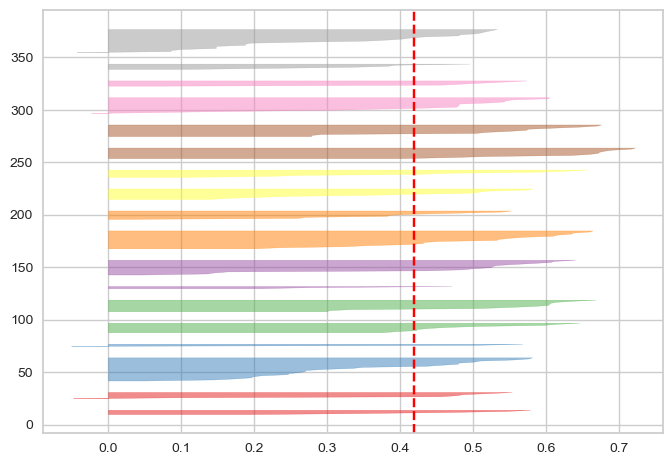

C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


silote scorefor   19 cluster is 0.4260242338325385


C:\Users\jitendra\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


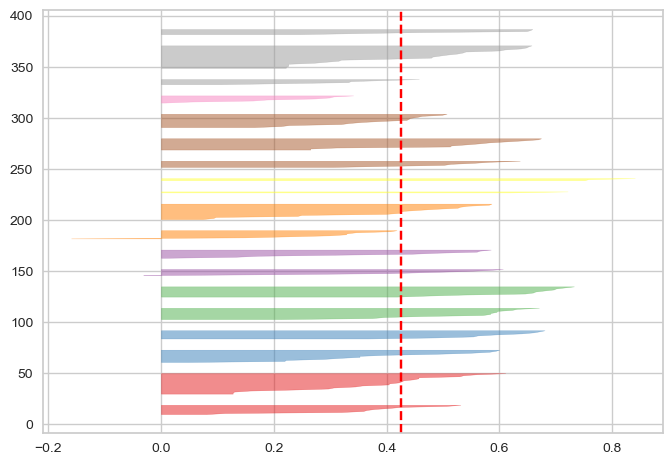

[0.35693558260199687, 0.464085451156394, 0.4970326297186363, 0.5582289588979077, 0.5424905196078038, 0.4596998896881322, 0.45543289610526977, 0.45426623046487186, 0.44500952592478654, 0.43407034210723955, 0.43610556796115496, 0.4080696799665663, 0.4128521353723772, 0.3856514677987681, 0.41244666567609195, 0.4126967929921025, 0.4195009507693789, 0.4260242338325385]


TypeError: Index(...) must be called with a collection of some kind, 'Sil_SCOre' was passed

In [46]:
result=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    sil_score=silhouette_score(df_sc, km.labels_)
    result.append(sil_score)
    print('silote scorefor'," ", i,'cluster' , 'is',sil_score )
    sil_km=SilhouetteVisualizer(km)
    sil_km.fit(df_sc)
    plt.show()

print(result)
array=np.array(result)
dfresult=pd.DataFrame(array,columns='Sil_SCOre')

In [ ]:
print(result)
array=np.array(result)
dfresult=pd.DataFrame(array,columns=['Sil_SCOre'])
dfresult